# Методы машинного обучения. 
## Лабораторная работа №6
### Анализ социологического исследования.
В Файле данные содержатся результат опроса населения о его условиях существования. Переменные разбиты на 2 класса - "Признаки состояния" - это субъективная оценка населения своего бытия и "Признаки причины" - объектные количественные признаки, оценивающие жизнедеятельность индивида и социума, в котором он проживает.
К признакам состояния относятся:

1.	Оценка благополучия
2.	Оценка социальной поддержки
3.	Ожидаемая продолжительность здоровой жизни
4.	Свобода граждан самостоятельно принимать жизненно важные решения
5.	Индекс Щедрости
6.	Индекс отношения к коррупции
7.	Оценка риска безработицы
8.	Индекс кредитного оптимизма
9.	Индекс страха социальных конфликтов
10.	Индекс семьи
11.	Индекс продовольственной безопасности
12.	Чувство технологического прогресса
13.	Чувство неравенства доходов в обществе

К индивидуальным признакам причины относятся:
1.	Среднегодовой доход, тыс. в долларах
2.	Объем потребленного алкоголя в год, л.
3.	Количество членов семьи
4.	Количество лет образования
5.	Доля от дохода семьи которая тратится на продовольствие, %

К общественным признакам причины относятся:
1.	Коэффициент Джини сообщества (Показатель степени расслоения общества по какому-либо социальному признаку. Одними из ключевых признаков, по которым рассчитывается коэффициент Джини, является уровень доходов и активов домохозяйств. Показатель может варьироваться в диапазоне от 0 до 1, и чем больше его значение, тем большее расслоение общества он отражает.)
2.	Издержки сообщества на окружающую среду, млн. долларов
3.	Охват беспроводной связи в сообществе, %
4.	Количество смертей от вирусных и респираторных заболеваний в сообществе, тыс. человек
5.	Волатильность потребительских цен в сообществе

Индивидуальные показатели характеризуют непосредственно индивида, общественные - сообщество в котором он проживает. В выборке могут присутствовать по несколько человек из одного сообщества. Все их общественные характеристики таким образом будут совпадать.
Также в данных присутствует интегральная характеристика удовлетворенности человека жизнью - для ее описания используется шкала Кантрила (см. рисунок 1)

Субъективные показатели качества жизни
Шкала Кантрила (The Cantril Scale) – простая визуальная шкала, которая позволяет оценить общую удовлетворенность жизнью.

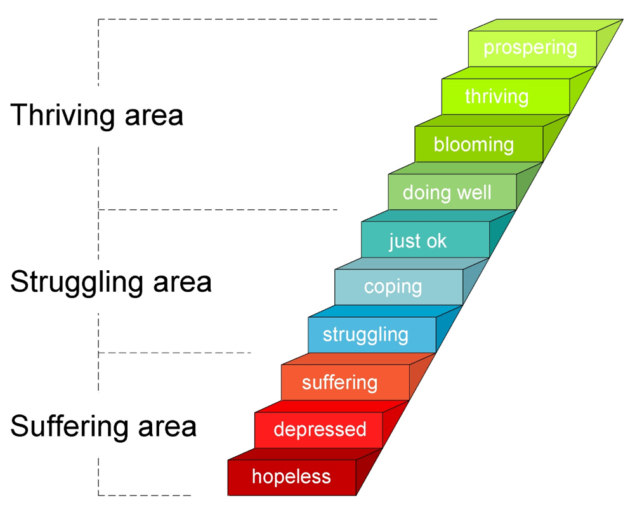
Рисунок 1. Шкала Кантрила.

Prospering – Процветающий/благоденствующий

Thriving – Преуспевающий

Blooming – Расцветающий

Doing well – Дела идут хорошо

Just Ok – Просто нормально

Coping – Справляющийся

Struggling – Столкнувшийся с трудностями/борющийся

Suffering – Страдающий

Depressed – Депрессивный

Hopeless – Безнадежный


Задание:

- Определить какие из признаков состояния наиболее сильно связаны с интегральной оценкой счастья (благополучия) респондента.
- Определить, как влияют признаки причины на наиболее важные признаки состояния.
- Пользуясь найденными закономерностями спрогнозировать попадание респондентов, у которых интегральная характеристика отмечена как "Неизвестно", в укрупненные группы шкалы Кантрила.

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data = pd.read_excel("data/ЛР6_Полные_данные.xlsx", engine='openpyxl')  

In [33]:
data.head()

,Респондент,Сообщество,"Среднегодовой.доход,.тыс..$","Объем.потребленного.алкоголя.в.год,.л.",Количество.членов.семьи,Количество.лет.образования,"Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%",Коэффициент.Джини.сообщества,"Издержки.сообщества.на.окружающую.среду,.млн..$","Охват.беспроводной.связи.в.сообществе,.%",...,Индекс.Щедрости,Индекс.отношения.к.коррупции,Оценка.риска.безработицы,Индекс.кредитного.оптимизма,Индекс.страха.социальных.конфликтов,Индекс.семьи,Индекс.продовольственной.безопасности,Чувство.технологического.прогресса,Чувство.неравенства.доходов.в.обществе,Ощущаемое.счастье
0,Респондент 1,Сообщество 480,21.350,62,4,5,65,0.608084,197.16,0.330140,...,67.0,69.0,71.0,38.0,92.0,11.0,95.0,16.0,14.0,Depressed
1,Респондент 2,Сообщество 130,622.613,30,7,21,39,0.369140,297.10,0.580329,...,49.0,29.0,36.0,66.0,31.0,49.0,3.0,72.0,60.0,Blooming
2,Респондент 3,Сообщество 156,400.896,45,2,8,45,0.345094,305.32,0.624832,...,19.0,73.0,49.0,61.0,19.0,39.0,82.0,38.0,60.0,Just ok
3,Респондент 4,Сообщество 69,375.950,56,5,10,68,0.635868,78.78,0.240157,...,83.0,50.0,67.0,35.0,77.0,28.0,50.0,33.0,1.0,Depressed
4,Респондент 5,Сообщество 330,925.782,39,6,18,38,0.787911,93.35,0.229719,...,76.0,62.0,44.0,40.0,86.0,51.0,76.0,64.0,55.0,Blooming


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 26 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Респондент                                                                             36000 non-null  object 
 1   Сообщество                                                                             36000 non-null  object 
 2   Среднегодовой.доход,.тыс..$                                                            36000 non-null  float64
 3   Объем.потребленного.алкоголя.в.год,.л.                                                 36000 non-null  int64  
 4   Количество.членов.семьи                                                                36000 non-null  int64  
 5   Количество.лет.образования                                                

In [35]:
data.describe()

,"Среднегодовой.доход,.тыс..$","Объем.потребленного.алкоголя.в.год,.л.",Количество.членов.семьи,Количество.лет.образования,"Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%",Коэффициент.Джини.сообщества,"Издержки.сообщества.на.окружающую.среду,.млн..$","Охват.беспроводной.связи.в.сообществе,.%","Количество.смертей.от.вирусных.и.респираторных.заболеваний.в.сообществе,.тыс..человек",Волатильность.потребительских.цен.в.сообществе,...,Свобода.граждан.самостоятельно.принимать.жизненно.важные.решения,Индекс.Щедрости,Индекс.отношения.к.коррупции,Оценка.риска.безработицы,Индекс.кредитного.оптимизма,Индекс.страха.социальных.конфликтов,Индекс.семьи,Индекс.продовольственной.безопасности,Чувство.технологического.прогресса,Чувство.неравенства.доходов.в.обществе
count,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,340.636416,51.230806,4.948806,13.692250,48.251472,0.572049,177.470434,0.446942,12.365640,3.474593,...,50.634600,50.124467,50.357500,49.870633,47.511667,50.301733,29.725900,50.239733,43.426100,50.719533
std,268.118668,12.218932,3.027117,5.856553,13.008347,0.280250,116.448698,0.258823,9.071492,2.179064,...,28.594487,28.583670,28.621848,17.598383,18.608749,28.559791,15.142277,28.477918,18.745975,28.718251
min,7.919000,10.000000,1.000000,0.000000,20.000000,-0.049854,0.000000,0.100000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,122.377750,43.000000,2.000000,9.000000,39.000000,0.333659,66.300000,0.202458,2.890000,1.746443,...,26.000000,25.000000,26.000000,37.000000,33.000000,26.000000,18.000000,25.000000,28.000000,26.000000
50%,264.020500,50.000000,4.000000,13.000000,47.000000,0.638293,160.110000,0.378335,12.200000,3.727851,...,51.000000,50.000000,50.000000,50.000000,46.000000,50.000000,28.000000,50.000000,41.000000,50.000000
75%,489.920250,60.000000,7.000000,19.000000,62.000000,0.823651,301.130000,0.691458,13.320000,5.525685,...,76.000000,75.000000,75.000000,63.000000,62.000000,75.000000,40.000000,75.000000,58.000000,76.000000
max,1534.666000,85.000000,12.000000,30.000000,80.000000,1.012268,400.000000,0.950000,35.000000,7.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [36]:
# Преобразование меток счастья в числовые значения
# Создание словаря соответствия категорий счастья числовым значениям
happiness_mapping = {
    'Prospering': 9,
    'Thriving': 8,
    'Blooming': 7,
    'Doing well': 6,
    'Just ok': 5,
    'Coping': 4,
    'Strugglng': 3,
    'Suffering': 2,
    'Depressed': 1,
    'Hopeless': 0,
    'Неизвестно': np.nan  # Заменяем "Неизвестно" на NaN
}

data['Ощущаемое.счастье'] = data['Ощущаемое.счастье'].map(happiness_mapping)

# Применение Label Encoding к признакам 'Респондент' и 'Сообщество'
label_encoder = LabelEncoder()
data['Респондент'] = label_encoder.fit_transform(data['Респондент'])
data['Сообщество'] = label_encoder.fit_transform(data['Сообщество'])

data

,Респондент,Сообщество,"Среднегодовой.доход,.тыс..$","Объем.потребленного.алкоголя.в.год,.л.",Количество.членов.семьи,Количество.лет.образования,"Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%",Коэффициент.Джини.сообщества,"Издержки.сообщества.на.окружающую.среду,.млн..$","Охват.беспроводной.связи.в.сообществе,.%",...,Индекс.Щедрости,Индекс.отношения.к.коррупции,Оценка.риска.безработицы,Индекс.кредитного.оптимизма,Индекс.страха.социальных.конфликтов,Индекс.семьи,Индекс.продовольственной.безопасности,Чувство.технологического.прогресса,Чувство.неравенства.доходов.в.обществе,Ощущаемое.счастье
0,0,423,21.350,62,4,5,65,0.608084,197.16,0.330140,...,67.0,69.0,71.0,38.0,92.0,11.0,95.0,16.0,14.0,1.0
1,11111,35,622.613,30,7,21,39,0.369140,297.10,0.580329,...,49.0,29.0,36.0,66.0,31.0,49.0,3.0,72.0,60.0,7.0
2,22222,63,400.896,45,2,8,45,0.345094,305.32,0.624832,...,19.0,73.0,49.0,61.0,19.0,39.0,82.0,38.0,60.0,5.0
3,29334,566,375.950,56,5,10,68,0.635868,78.78,0.240157,...,83.0,50.0,67.0,35.0,77.0,28.0,50.0,33.0,1.0,1.0
4,30445,257,925.782,39,6,18,38,0.787911,93.35,0.229719,...,76.0,62.0,44.0,40.0,86.0,51.0,76.0,64.0,55.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,28885,243,412.715,46,3,11,50,0.921816,59.51,0.227329,...,14.0,80.0,53.0,30.0,35.0,24.0,29.0,33.0,11.0,2.0
35996,28886,316,373.757,48,1,8,50,0.620469,144.79,0.385055,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35997,28887,258,374.882,38,1,18,39,0.498873,207.14,0.495535,...,10.0,76.0,27.0,63.0,96.0,35.0,58.0,55.0,2.0,8.0
35998,28888,337,412.314,51,3,12,44,0.663517,108.70,0.269634,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Удаление строк с пропущенными значениями
data_cleaned = data.dropna()
data_cleaned

,Респондент,Сообщество,"Среднегодовой.доход,.тыс..$","Объем.потребленного.алкоголя.в.год,.л.",Количество.членов.семьи,Количество.лет.образования,"Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%",Коэффициент.Джини.сообщества,"Издержки.сообщества.на.окружающую.среду,.млн..$","Охват.беспроводной.связи.в.сообществе,.%",...,Индекс.Щедрости,Индекс.отношения.к.коррупции,Оценка.риска.безработицы,Индекс.кредитного.оптимизма,Индекс.страха.социальных.конфликтов,Индекс.семьи,Индекс.продовольственной.безопасности,Чувство.технологического.прогресса,Чувство.неравенства.доходов.в.обществе,Ощущаемое.счастье
0,0,423,21.350,62,4,5,65,0.608084,197.16,0.330140,...,67.0,69.0,71.0,38.0,92.0,11.0,95.0,16.0,14.0,1.0
1,11111,35,622.613,30,7,21,39,0.369140,297.10,0.580329,...,49.0,29.0,36.0,66.0,31.0,49.0,3.0,72.0,60.0,7.0
2,22222,63,400.896,45,2,8,45,0.345094,305.32,0.624832,...,19.0,73.0,49.0,61.0,19.0,39.0,82.0,38.0,60.0,5.0
3,29334,566,375.950,56,5,10,68,0.635868,78.78,0.240157,...,83.0,50.0,67.0,35.0,77.0,28.0,50.0,33.0,1.0,1.0
4,30445,257,925.782,39,6,18,38,0.787911,93.35,0.229719,...,76.0,62.0,44.0,40.0,86.0,51.0,76.0,64.0,55.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35993,28883,390,458.691,47,1,14,50,0.356139,260.35,0.497796,...,14.0,75.0,39.0,66.0,67.0,39.0,71.0,51.0,48.0,5.0
35994,28884,519,418.492,54,2,11,47,0.841676,21.94,0.173420,...,32.0,90.0,50.0,30.0,19.0,26.0,32.0,33.0,7.0,2.0
35995,28885,243,412.715,46,3,11,50,0.921816,59.51,0.227329,...,14.0,80.0,53.0,30.0,35.0,24.0,29.0,33.0,11.0,2.0
35997,28887,258,374.882,38,1,18,39,0.498873,207.14,0.495535,...,10.0,76.0,27.0,63.0,96.0,35.0,58.0,55.0,2.0,8.0


In [55]:
import pandas as pd

if unknown_data['Ощущаемое.счастье'].isnull().any():
    print("Пропущенные значения (np.nan) найдены")
else:
    print("Пропущенные значения (np.nan) отсутствуют")

Пропущенные значения (np.nan) найдены


In [39]:
# Разделение на признаки и целевую переменную
features = data_cleaned.drop(['Ощущаемое.счастье', 'Респондент'], axis=1)
target = data_cleaned['Ощущаемое.счастье']

In [40]:
features

,Сообщество,"Среднегодовой.доход,.тыс..$","Объем.потребленного.алкоголя.в.год,.л.",Количество.членов.семьи,Количество.лет.образования,"Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%",Коэффициент.Джини.сообщества,"Издержки.сообщества.на.окружающую.среду,.млн..$","Охват.беспроводной.связи.в.сообществе,.%","Количество.смертей.от.вирусных.и.респираторных.заболеваний.в.сообществе,.тыс..человек",...,Свобода.граждан.самостоятельно.принимать.жизненно.важные.решения,Индекс.Щедрости,Индекс.отношения.к.коррупции,Оценка.риска.безработицы,Индекс.кредитного.оптимизма,Индекс.страха.социальных.конфликтов,Индекс.семьи,Индекс.продовольственной.безопасности,Чувство.технологического.прогресса,Чувство.неравенства.доходов.в.обществе
0,423,21.350,62,4,5,65,0.608084,197.16,0.330140,14.18,...,78.0,67.0,69.0,71.0,38.0,92.0,11.0,95.0,16.0,14.0
1,35,622.613,30,7,21,39,0.369140,297.10,0.580329,11.70,...,9.0,49.0,29.0,36.0,66.0,31.0,49.0,3.0,72.0,60.0
2,63,400.896,45,2,8,45,0.345094,305.32,0.624832,2.01,...,35.0,19.0,73.0,49.0,61.0,19.0,39.0,82.0,38.0,60.0
3,566,375.950,56,5,10,68,0.635868,78.78,0.240157,13.42,...,95.0,83.0,50.0,67.0,35.0,77.0,28.0,50.0,33.0,1.0
4,257,925.782,39,6,18,38,0.787911,93.35,0.229719,12.38,...,84.0,76.0,62.0,44.0,40.0,86.0,51.0,76.0,64.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35993,390,458.691,47,1,14,50,0.356139,260.35,0.497796,12.09,...,38.0,14.0,75.0,39.0,66.0,67.0,39.0,71.0,51.0,48.0
35994,519,418.492,54,2,11,47,0.841676,21.94,0.173420,21.86,...,38.0,32.0,90.0,50.0,30.0,19.0,26.0,32.0,33.0,7.0
35995,243,412.715,46,3,11,50,0.921816,59.51,0.227329,13.41,...,80.0,14.0,80.0,53.0,30.0,35.0,24.0,29.0,33.0,11.0
35997,258,374.882,38,1,18,39,0.498873,207.14,0.495535,11.87,...,28.0,10.0,76.0,27.0,63.0,96.0,35.0,58.0,55.0,2.0


In [41]:
target

0        1.0
1        7.0
2        5.0
3        1.0
4        7.0
        ... 
35993    5.0
35994    2.0
35995    2.0
35997    8.0
35999    5.0
Name: Ощущаемое.счастье, Length: 30000, dtype: float64

In [42]:
# Вычисляем матрицу корреляций между всеми признаками
correlation_matrix = known_data.corr()

happiness_corr = correlation_matrix['Ощущаемое.счастье'].abs().sort_values(ascending=False)
print(happiness_corr)

Ощущаемое.счастье                                                                        1.000000
Чувство.технологического.прогресса                                                       0.913740
Оценка.социальной.поддержки                                                              0.894181
Оценка.риска.безработицы                                                                 0.837481
Индекс.семьи                                                                             0.802395
Количество.лет.образования                                                               0.781665
Индекс.кредитного.оптимизма                                                              0.779343
Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%                               0.724539
Объем.потребленного.алкоголя.в.год,.л.                                                   0.692459
Среднегодовой.доход,.тыс..$                                                              0.606202
Издержки.сообщества.

Признаки состояния наиболее сильно связаны с интегральной оценкой счастья (благополучия) респондента:
- Чувство.технологического.прогресса
- Оценка.социальной.поддержки
- Оценка.риска.безработицы
- Индекс.семьи
- Индекс.кредитного.оптимизма

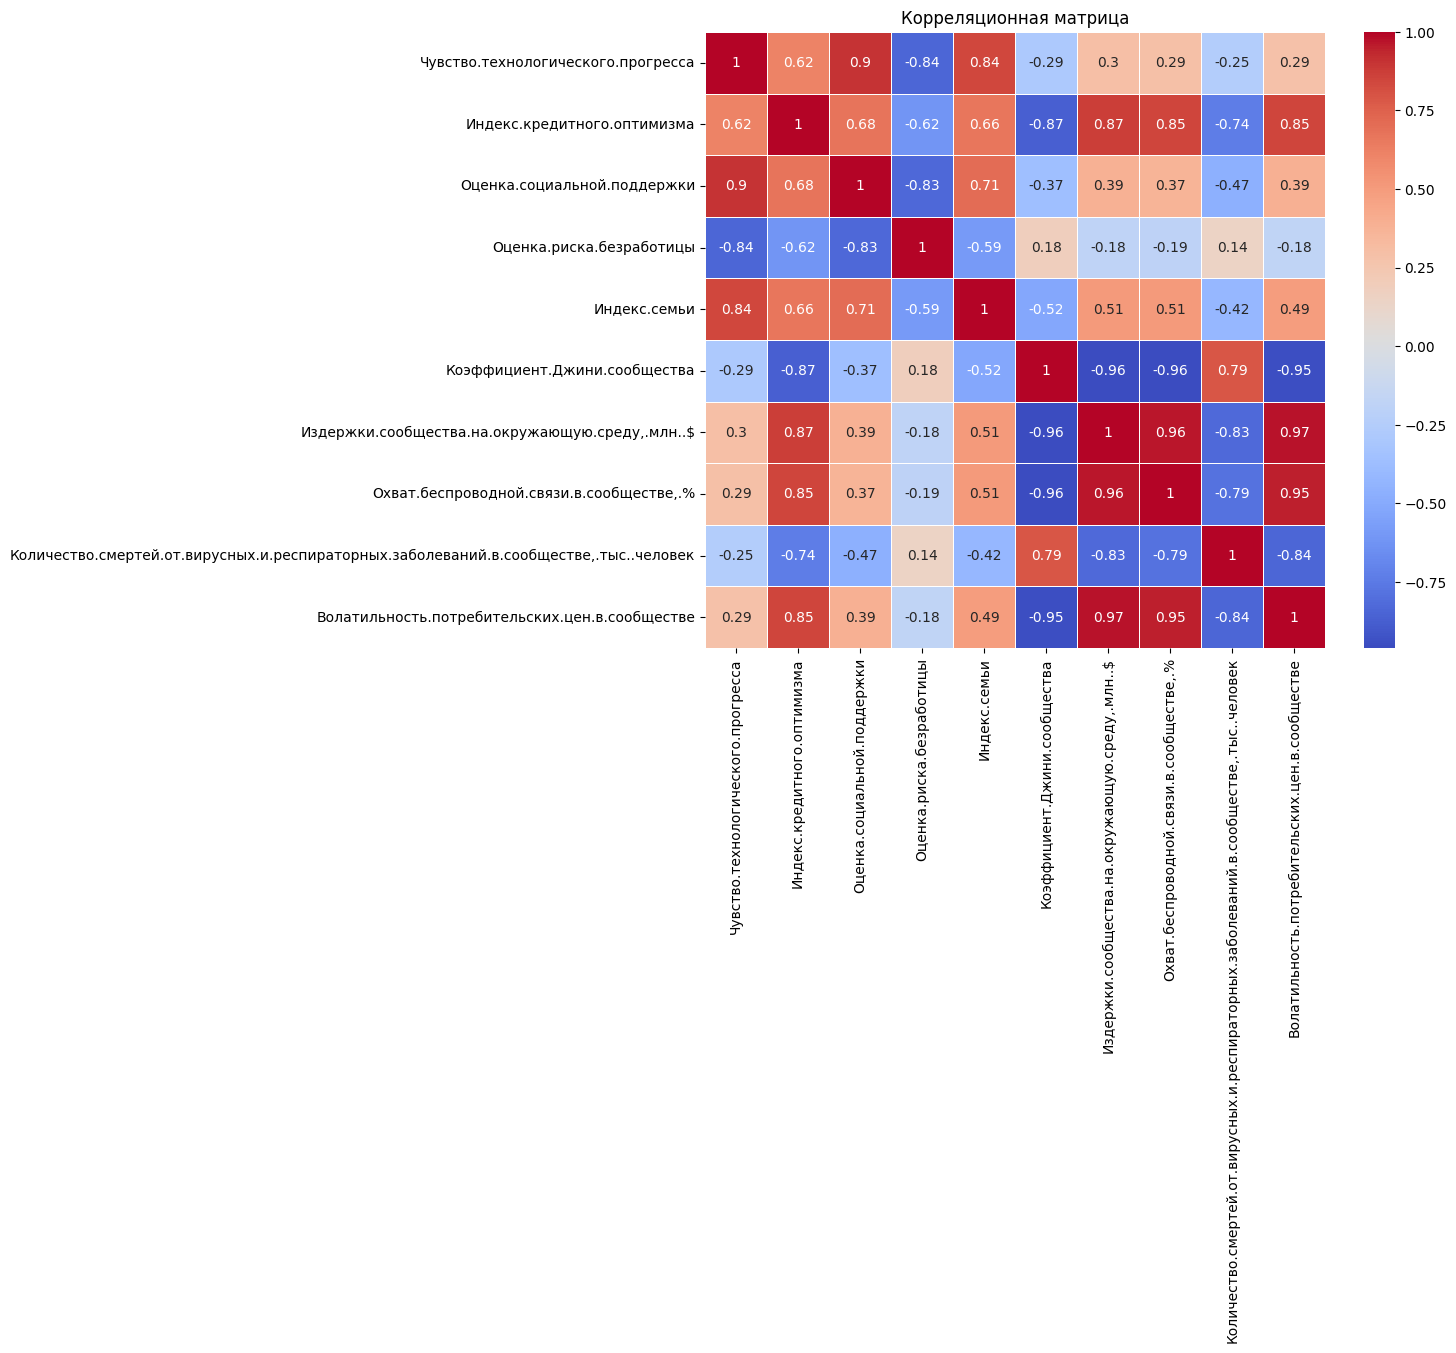

In [44]:
# Определите интересующие вас признаки состояния и причины
features_of_interest = ['Чувство.технологического.прогресса', 'Индекс.кредитного.оптимизма', 'Оценка.социальной.поддержки', 
                        'Оценка.риска.безработицы', 'Индекс.семьи', 'Коэффициент.Джини.сообщества', 'Издержки.сообщества.на.окружающую.среду,.млн..$', 
                            'Охват.беспроводной.связи.в.сообществе,.%', 'Количество.смертей.от.вирусных.и.респираторных.заболеваний.в.сообществе,.тыс..человек',
                           'Волатильность.потребительских.цен.в.сообществе']

# Выбираем только интересующие признаки из матрицы корреляций
subset_correlation_matrix = correlation_matrix[features_of_interest].loc[features_of_interest]

# Создание тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(subset_correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Корреляционная матрица")
plt.show()

In [ ]:
# Разделение признаков на классы
state_features = ['Оценка.благополучия',	'Оценка.социальной.поддержки',	'Ожидаемая.продолжительность.здоровой.жизни',	
                  'Свобода.граждан.самостоятельно.принимать.жизненно.важные.решения',	'Индекс.Щедрости',	'Индекс.отношения.к.коррупции',	
                  'Оценка.риска.безработицы',	'Индекс.кредитного.оптимизма',	'Индекс.страха.социальных.конфликтов',	'Индекс.семьи',	
                  'Индекс.продовольственной.безопасности',	'Чувство.технологического.прогресса',	'Чувство.неравенства.доходов.в.обществе']
individual_cause_features = ['Среднегодовой.доход,.тыс..$',	'Объем.потребленного.алкоголя.в.год,.л.'	,'Количество.членов.семьи',	
                             'Количество.лет.образования','Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%']
society_cause_features = ['Коэффициент.Джини.сообщества',	'Издержки.сообщества.на.окружающую.среду,.млн..$',	
                          'Охват.беспроводной.связи.в.сообществе,.%', 
                          'Количество.смертей.от.вирусных.и.респираторных.заболеваний.в.сообществе,.тыс..человек',	
                          'Волатильность.потребительских.цен.в.сообществе']

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Шаг 2: Разделение данных на известные и неизвестные
known_data = data.dropna(subset=['Ощущаемое.счастье'])
unknown_data = data[data['Ощущаемое.счастье'].isna()]

# Шаг 3: Анализ корреляции признаков состояния с меткой счастья
X_known = known_data[state_features]
y_known = known_data['Ощущаемое.счастье']

# Шаг 4: Построение модели для предсказания метки счастья
X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Среднеквадратичная ошибка модели:", mse)


Среднеквадратичная ошибка модели: 0.6161277236636622


In [73]:
# Шаг 6: Прогнозирование попадания в группы шкалы Кантрила для неизвестных данных
unknown_cause_features = cause_features  # Используем те же признаки причины
X_unknown_cause = unknown_data[unknown_cause_features]

# Кластеризация методом KMeans
num_clusters = 10  # Количество групп в шкале Кантрила
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
unknown_data_copy = unknown_data.copy()  # Создаем копию, чтобы избежать SettingWithCopyWarning
unknown_data_copy['Ощущаемое.счастье'] = kmeans.fit_predict(X_unknown_cause)

# Вывод результата кластеризации
print("Результат кластеризации для неизвестных данных:")
print(unknown_data_copy[['Респондент', 'Ощущаемое.счастье']])

Результат кластеризации для неизвестных данных:
       Респондент  Ощущаемое.счастье
6           32667                  1
14           5556                  8
20          12223                  6
32          25556                  3
33          26667                  9
...           ...                ...
35978       28866                  5
35981       28870                  9
35991       28881                  8
35996       28886                  5
35998       28888                  2

[6000 rows x 2 columns]


In [74]:
# Шаг 7: Сводная информация о кластерах
cluster_summary = unknown_data_copy.groupby('Категория').describe()
print("Сводная информация о кластерах:")
cluster_summary

Сводная информация о кластерах:


Респондент                                                        \
               count          mean           std     min      25%      50%   
Категория                                                                    
0              835.0  17981.645509  10451.830739   126.0  8788.50  17927.0   
1              416.0  18340.872596  10748.342789     5.0  8154.50  19908.5   
2              686.0  18642.763848  10591.083042    24.0  9713.25  19004.5   
3             1095.0  17982.374429  10402.337007    23.0  9124.50  17929.0   
4               23.0  17109.434783  11350.916566  1881.0  6879.50  17249.0   
5              788.0  18694.364213  10361.882694    32.0  9242.00  19301.0   
6              411.0  17341.145985  10317.386067    50.0  8452.00  17485.0   
7              202.0  17814.054455  10510.298838     3.0  9066.50  17963.5   
8             1121.0  18133.876004  10448.440301    41.0  9555.00  17768.0   
9              423.0  17092.319149  10235.237809   132.0  8034.00  16233.0   

                             Сообщество              ...  \
                75%      max      count        mean  ...   
Категория                                            ...   
0          26956.00  35969.0      835.0  292.117365  ...   
1          27534.75  35875.0      416.0  305.247596  ...   
2          27996.75  35996.0      686.0  303.663265  ...   
3          26952.00  35910.0     1095.0  294.355251  ...   
4          27894.50  35861.0       23.0  313.739130  ...   
5          27639.75  35928.0      788.0  304.477157  ...   
6          25608.00  35980.0      411.0  309.732360  ...   
7          27149.00  35710.0      202.0  286.400990  ...   
8          27312.00  35953.0     1121.0  305.675290  ...   
9          25695.00  35920.0      423.0  314.420804  ...   

          Чувство.неравенства.доходов.в.обществе     Ощущаемое.счастье       \
                                             75% max             count mean   
Категория                                                                     
0                                            NaN NaN             835.0  0.0   
1                                            NaN NaN             416.0  1.0   
2                                            NaN NaN             686.0  2.0   
3                                            NaN NaN            1095.0  3.0   
4                                            NaN NaN              23.0  4.0   
5                                            NaN NaN             788.0  5.0   
6                                            NaN NaN             411.0  6.0   
7                                            NaN NaN             202.0  7.0   
8                                            NaN NaN            1121.0  8.0   
9                                            NaN NaN             423.0  9.0   

                                         
           std  min  25%  50%  75%  max  
Категория                                
0          0.0  0.0  0.0  0.0  0.0  0.0  
1          0.0  1.0  1.0  1.0  1.0  1.0  
2          0.0  2.0  2.0  2.0  2.0  2.0  
3          0.0  3.0  3.0  3.0  3.0  3.0  
4          0.0  4.0  4.0  4.0  4.0  4.0  
5          0.0  5.0  5.0  5.0  5.0  5.0  
6          0.0  6.0  6.0  6.0  6.0  6.0  
7          0.0  7.0  7.0  7.0  7.0  7.0  
8          0.0  8.0  8.0  8.0  8.0  8.0  
9          0.0  9.0  9.0  9.0  9.0  9.0  

[10 rows x 208 columns]

In [71]:
unknown_data_copy

,Респондент,Сообщество,"Среднегодовой.доход,.тыс..$","Объем.потребленного.алкоголя.в.год,.л.",Количество.членов.семьи,Количество.лет.образования,"Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%",Коэффициент.Джини.сообщества,"Издержки.сообщества.на.окружающую.среду,.млн..$","Охват.беспроводной.связи.в.сообществе,.%",...,Индекс.отношения.к.коррупции,Оценка.риска.безработицы,Индекс.кредитного.оптимизма,Индекс.страха.социальных.конфликтов,Индекс.семьи,Индекс.продовольственной.безопасности,Чувство.технологического.прогресса,Чувство.неравенства.доходов.в.обществе,Ощущаемое.счастье,Категория
6,32667,438,833.042,34,2,18,38,0.291490,296.46,0.676323,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
14,5556,119,101.207,65,4,4,69,0.070392,310.57,0.841053,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
20,12223,511,627.500,51,1,13,45,0.897229,40.58,0.143282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
32,25556,180,93.401,50,3,10,48,0.376128,298.07,0.500573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
33,26667,340,715.802,39,3,24,34,0.000480,369.99,0.947781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35978,28866,183,360.371,38,6,20,36,0.340375,248.53,0.604692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
35981,28870,226,745.104,45,6,13,44,0.186150,311.63,0.848319,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
35991,28881,473,173.444,72,1,5,67,0.364146,246.84,0.532461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
35996,28886,316,373.757,48,1,8,50,0.620469,144.79,0.385055,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [75]:
predicted_happiness = model.predict(X_known_scaled)  # Используйте те же данные, что и для обучения

# Создание DataFrame с предсказанными метками счастья и категориями
predicted_data = pd.DataFrame({
    'Респондент': known_data['Респондент'],
    'Предсказанное счастье': predicted_happiness,
    'Категория': known_data_copy['Категория']  # Категории из шага 6
})

# Группировка данных по категориям и агрегирование средних предсказанных меток счастья
grouped_data = predicted_data.groupby('Категория')['Предсказанное счастье'].mean()

# Вывод результата анализа связи между категориями и предсказанным счастьем
print("Связь между категориями и предсказанным счастьем:")
print(grouped_data)

NameError: name 'X_known_scaled' is not defined

In [49]:
# Разделение данных на известные и неизвестные записи
known_data = data.dropna(subset=['Ощущаемое.счастье'])
unknown_data = data[data['Ощущаемое.счастье'].isnull()]



# Разделение данных на обучающую и тестовую выборки
X_known = known_data[state_features]
y_known = known_data['Ощущаемое.счастье']
X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.2, random_state=42)

# Обучение модели для предсказания ощущения счастья на основе признаков состояния
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Важность признаков для модели
feature_importances = model.coef_
print("Feature Importances:", feature_importances)

# Предсказание ощущения счастья для неизвестных записей
X_unknown = unknown_data[state_features]
unknown_predictions = model.predict(X_unknown)
unknown_data['Predicted_Happiness'] = unknown_predictions

# Классификация записей на основе ощущения счастья
bins = [0, 2, 4, 6, 8, 10]
labels = ['Struggling', 'Coping', 'Doing well', 'Thriving', 'Prospering']
unknown_data['Happiness_Category'] = pd.cut(unknown_data['Predicted_Happiness'], bins=bins, labels=labels)

# Обучение модели классификации для предсказания категории счастья
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_scaled, y_train)
y_pred_class = classifier.predict(X_test_scaled)
print(classification_report(y_test, y_pred_class))

# Предсказание категории счастья для неизвестных записей
X_unknown_scaled = scaler.transform(X_unknown)
unknown_categories = classifier.predict(X_unknown_scaled)
unknown_data['Predicted_Happiness_Category'] = unknown_categories

# Вывод результатов
print(unknown_data[['Респондент', 'Predicted_Happiness_Category']])

Mean Squared Error: 0.6161277236636622
Feature Importances: [ 2.60199897e-04  2.30464800e-02  8.83030960e-05 -2.39891460e-04
 -9.55212766e-05 -6.53924584e-05 -1.70694095e-02  4.27339926e-02
  2.96694253e-04  7.55288443e-03 -3.38580015e-04  6.81780268e-02
  2.80286136e-05]


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [45]:
# Шаг 2: Разделение данных на известные и неизвестные
known_data = data[data['Ощущаемое.счастье'].notnull()]
unknown_data = data[data['Ощущаемое.счастье'].isnull()]

In [46]:
correlation_matrix = known_data.corr()
happiness_correlations = correlation_matrix['Ощущаемое.счастье'].sort_values(ascending=False)

In [48]:
# Наиболее сильно связанные признаки состояния
most_correlated_state_features = ['Чувство.технологического.прогресса', 'Индекс.кредитного.оптимизма', 'Оценка.социальной.поддержки', 
                        'Оценка.риска.безработицы', 'Индекс.семьи']

# Шаг 4: Построение модели для предсказания счастья
X = known_data.drop(['Ощущаемое.счастье'], axis=1)
y = known_data['Ощущаемое.счастье']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Шаг 5: Оценка модели
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Шаг 6: Применение модели к неизвестным данным
unknown_features = unknown_data.drop(['Ощущаемое.счастье'], axis=1)
predicted_happiness = model.predict(unknown_features)

# Шаг 7: Категоризация предсказанных значений счастья
happiness_labels = ['Процветающий', 'Преуспевающий', 'Расцветающий', 'Дела идут хорошо',
                    'Просто нормально', 'Справляющийся', 'Столкнувшийся с трудностями',
                    'Страдающий', 'Депрессивный', 'Безнадежный']

predicted_labels = [happiness_labels[int(round(value))] for value in predicted_happiness]

# Шаг 8: Добавление предсказанных значений в неизвестные данные
unknown_data['Ощущаемое.счастье'] = predicted_labels

# Вывод результатов
print(unknown_data[['Респондент', 'Ощущаемое.счастье']])

Mean Squared Error: 0.6128648191159642


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [42]:
# Разделение на признаки и целевую переменную
features = data_cleaned.drop(['Ощущаемое.счастье'], axis=1)
target = data_cleaned['Ощущаемое.счастье']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Инициализация и обучение модели
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.13600788333333333


In [44]:
# Выборка данных с неизвестной меткой счастья
unknown_data = data[data['Ощущаемое.счастье'].isnull()]
unknown_features = unknown_data.drop(['Ощущаемое.счастье'], axis=1)
unknown_features

,Респондент,Сообщество,"Среднегодовой.доход,.тыс..$","Объем.потребленного.алкоголя.в.год,.л.",Количество.членов.семьи,Количество.лет.образования,"Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%",Коэффициент.Джини.сообщества,"Издержки.сообщества.на.окружающую.среду,.млн..$","Охват.беспроводной.связи.в.сообществе,.%",...,Свобода.граждан.самостоятельно.принимать.жизненно.важные.решения,Индекс.Щедрости,Индекс.отношения.к.коррупции,Оценка.риска.безработицы,Индекс.кредитного.оптимизма,Индекс.страха.социальных.конфликтов,Индекс.семьи,Индекс.продовольственной.безопасности,Чувство.технологического.прогресса,Чувство.неравенства.доходов.в.обществе
6,32667,438,833.042,34,2,18,38,0.291490,296.46,0.676323,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,5556,119,101.207,65,4,4,69,0.070392,310.57,0.841053,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,12223,511,627.500,51,1,13,45,0.897229,40.58,0.143282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,25556,180,93.401,50,3,10,48,0.376128,298.07,0.500573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,26667,340,715.802,39,3,24,34,0.000480,369.99,0.947781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35978,28866,183,360.371,38,6,20,36,0.340375,248.53,0.604692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35981,28870,226,745.104,45,6,13,44,0.186150,311.63,0.848319,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35991,28881,473,173.444,72,1,5,67,0.364146,246.84,0.532461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35996,28886,316,373.757,48,1,8,50,0.620469,144.79,0.385055,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# Предсказание меток счастья только для строк без пропусков
unknown_features_cleaned = unknown_features.dropna()
unknown_features_cleaned

,Респондент,Сообщество,"Среднегодовой.доход,.тыс..$","Объем.потребленного.алкоголя.в.год,.л.",Количество.членов.семьи,Количество.лет.образования,"Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%",Коэффициент.Джини.сообщества,"Издержки.сообщества.на.окружающую.среду,.млн..$","Охват.беспроводной.связи.в.сообществе,.%","Количество.смертей.от.вирусных.и.респираторных.заболеваний.в.сообществе,.тыс..человек",Волатильность.потребительских.цен.в.сообществе
6,32667,438,833.042,34,2,18,38,0.291490,296.46,0.676323,2.69,5.617298
14,5556,119,101.207,65,4,4,69,0.070392,310.57,0.841053,2.34,6.443787
20,12223,511,627.500,51,1,13,45,0.897229,40.58,0.143282,24.12,0.550675
32,25556,180,93.401,50,3,10,48,0.376128,298.07,0.500573,12.71,5.066817
33,26667,340,715.802,39,3,24,34,0.000480,369.99,0.947781,1.53,6.758049
...,...,...,...,...,...,...,...,...,...,...,...,...
35978,28866,183,360.371,38,6,20,36,0.340375,248.53,0.604692,11.67,5.273648
35981,28870,226,745.104,45,6,13,44,0.186150,311.63,0.848319,3.08,6.499645
35991,28881,473,173.444,72,1,5,67,0.364146,246.84,0.532461,12.97,5.360152
35996,28886,316,373.757,48,1,8,50,0.620469,144.79,0.385055,11.87,3.633531


In [48]:
# Удаление столбцов, где все значения являются NaN
unknown_features_cleaned = unknown_features.dropna(axis=1, how='all')


In [49]:
unknown_features_cleaned


,Респондент,Сообщество,"Среднегодовой.доход,.тыс..$","Объем.потребленного.алкоголя.в.год,.л.",Количество.членов.семьи,Количество.лет.образования,"Доля.от.дохода.семьи.которая.тратится.на.продовольствие,.%",Коэффициент.Джини.сообщества,"Издержки.сообщества.на.окружающую.среду,.млн..$","Охват.беспроводной.связи.в.сообществе,.%","Количество.смертей.от.вирусных.и.респираторных.заболеваний.в.сообществе,.тыс..человек",Волатильность.потребительских.цен.в.сообществе
6,32667,438,833.042,34,2,18,38,0.291490,296.46,0.676323,2.69,5.617298
14,5556,119,101.207,65,4,4,69,0.070392,310.57,0.841053,2.34,6.443787
20,12223,511,627.500,51,1,13,45,0.897229,40.58,0.143282,24.12,0.550675
32,25556,180,93.401,50,3,10,48,0.376128,298.07,0.500573,12.71,5.066817
33,26667,340,715.802,39,3,24,34,0.000480,369.99,0.947781,1.53,6.758049
...,...,...,...,...,...,...,...,...,...,...,...,...
35978,28866,183,360.371,38,6,20,36,0.340375,248.53,0.604692,11.67,5.273648
35981,28870,226,745.104,45,6,13,44,0.186150,311.63,0.848319,3.08,6.499645
35991,28881,473,173.444,72,1,5,67,0.364146,246.84,0.532461,12.97,5.360152
35996,28886,316,373.757,48,1,8,50,0.620469,144.79,0.385055,11.87,3.633531


In [50]:
# Предсказание меток счастья только для строк без пропусков и на оставшихся столбцах
unknown_pred = model.predict(unknown_features_cleaned)

# Добавляем предсказанные метки счастья обратно в исходные данные
unknown_data.loc[unknown_features_cleaned.index, 'Ощущаемое.счастье'] = unknown_pred

# Визуализация результатов
plt.hist(unknown_data['Ощущаемое.счастье'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Ощущаемое.счастье')
plt.ylabel('Частота')
plt.title('Распределение предсказанных меток счастья для незаполненных данных')
plt.show()


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Индекс.Щедрости
- Индекс.кредитного.оптимизма
- Индекс.отношения.к.коррупции
- Индекс.продовольственной.безопасности
- Индекс.семьи
- ...


In [46]:
# Предсказание меток счастья только для строк без пропусков
unknown_features_cleaned = unknown_features.dropna()
unknown_pred = model.predict(unknown_features_cleaned)

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Признак': X_train.columns, 'Важность': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Важность', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Признак'], feature_importance_df['Важность'])
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.title('Влияние признаков на Ощущаемое.счастье')
plt.show()

In [7]:
feature_importance_df

NameError: name 'feature_importance_df' is not defined

In [8]:
# Вычисляем матрицу корреляций между всеми признаками
correlation_matrix = data_cleaned.corr()

# Определите интересующие вас признаки состояния и причины
features_of_interest = ['Чувство.технологического.прогресса', 'Индекс.кредитного.оптимизма', 'Оценка.социальной.поддержки', 
                        'Оценка.риска.безработицы', 'Индекс.семьи', 'Коэффициент.Джини.сообщества', 'Издержки.сообщества.на.окружающую.среду,.млн..$', 
                            'Охват.беспроводной.связи.в.сообществе,.%', 'Количество.смертей.от.вирусных.и.респираторных.заболеваний.в.сообществе,.тыс..человек',
                           'Волатильность.потребительских.цен.в.сообществе']
# Замените ... на остальные признаки, которые вас интересуют

# Выбираем только интересующие признаки из матрицы корреляций
subset_correlation_matrix = correlation_matrix[features_of_interest].loc[features_of_interest]

# Создаем тепловую карту для визуализации
plt.figure(figsize=(12, 8))
sns.heatmap(subset_correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Тепловая карта корреляции признаков причины и наиболее важных признаков состояния')
plt.show()

NameError: name 'data_cleaned' is not defined

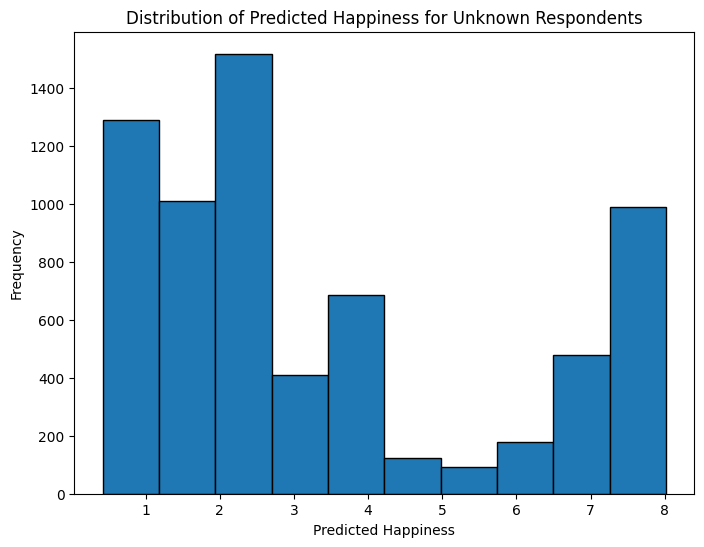

In [115]:
plt.figure(figsize=(8, 6))
plt.hist(unknown_pred, edgecolor='black')
plt.xlabel('Predicted Happiness')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Happiness for Unknown Respondents')
plt.show()

C:\Users\AlexB\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\AlexB\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:1133: RuntimeWarning: invalid value encountered in sqrt
  size = np.sqrt(val)


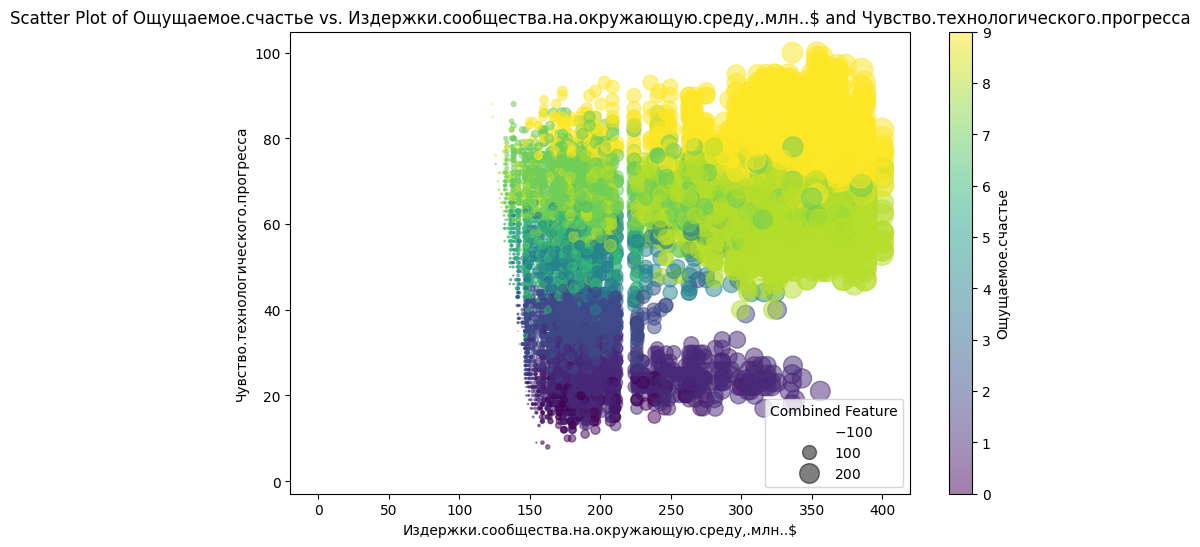

In [126]:
# Выбранные показатели
cause_feature = 'Издержки.сообщества.на.окружающую.среду,.млн..$'
state_feature = 'Чувство.технологического.прогресса'
happiness_label = 'Ощущаемое.счастье'

# Создаем scatter plot с использованием третьего показателя в качестве размера точек
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_cleaned[cause_feature], data_cleaned[state_feature], c=data_cleaned[happiness_label], cmap='viridis', s=data_cleaned['Combined_Feature'], alpha=0.5)
plt.colorbar(label=happiness_label)
plt.xlabel(cause_feature)
plt.ylabel(state_feature)
plt.title(f'Scatter Plot of {happiness_label} vs. {cause_feature} and {state_feature}')
plt.legend(*scatter.legend_elements("sizes", num=5), title="Combined Feature")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(data_cleaned, edgecolor='black')
plt.xlabel('Predicted Happiness')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Happiness for Unknown Respondents')
plt.show()